In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/Healthcare_Costs.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,ID,AgeGroup,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,1,Teen,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,2,Teen,Obese
2,28,male,33.000,3,no,southeast,4449.46200,3,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,4,Young Adult,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,5,Young Adult,Overweight


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   ID            1338 non-null   int64  
 8   AgeGroup      1338 non-null   object 
 9   BMI_Category  1338 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 104.7+ KB


age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
ID              0
AgeGroup        0
BMI_Category    0
dtype: int64

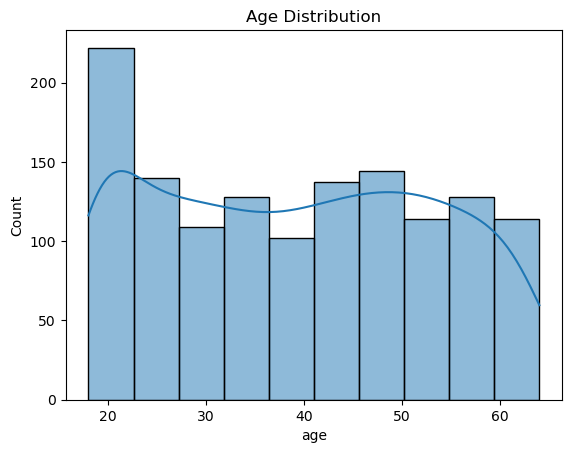

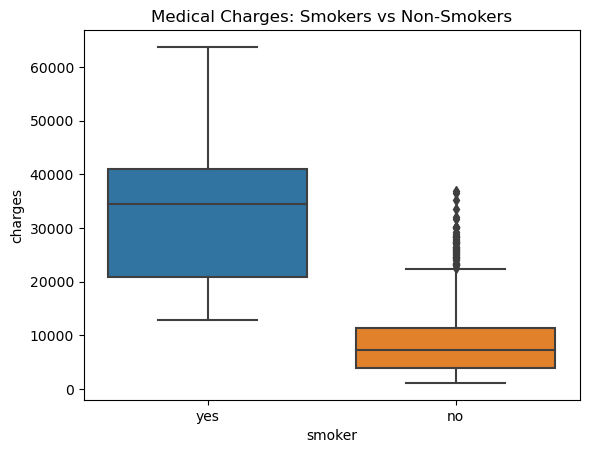

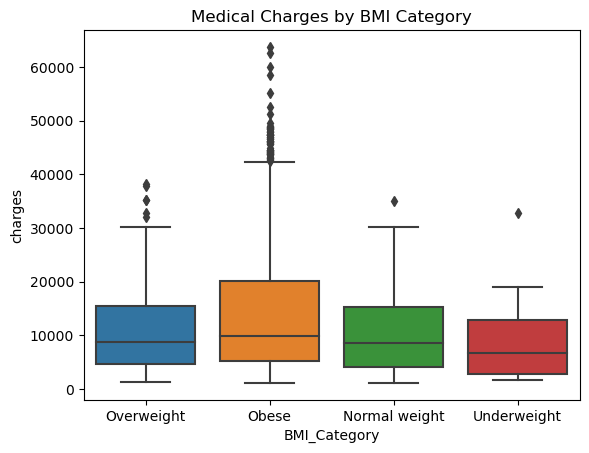

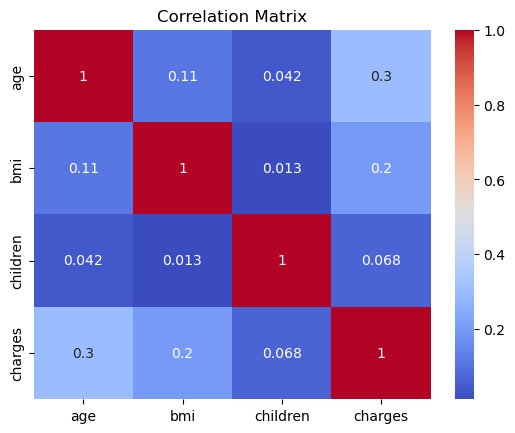

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

# Charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges: Smokers vs Non-Smokers")
plt.show()

# Charges by BMI category
sns.boxplot(x='BMI_Category', y='charges', data=df)
plt.title("Medical Charges by BMI Category")
plt.show()

# Correlation heatmap
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region', 'BMI_Category', 'AgeGroup'], drop_first=True)

X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4382.064413850327
R² Score: 0.7769107552540748
